In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

In [2]:
from prediction_helpers import *

In [3]:
ExE = pd.read_csv('../../extracted_data/ExE_imputed_5.csv', sep=',', index_col=0)
NxN = pd.read_csv('../../extracted_data/NxN_imputed_10.csv', sep=',', index_col=0)
ExN = pd.read_csv('../../extracted_data/ExN_filled_20.csv', sep=',', index_col=0)
embeddings = pd.read_csv('../../extracted_data/yeast_emb_embeddings_yeastnet_genex.csv', sep=',', index_col=0)
embeddings = embeddings.reset_index().set_index('gene_id')

In [4]:
pca_linear_regression = Pipeline([
    ('pca', PCA(n_components=0.9)), 
    ('linear_regression', LinearRegression())
])
pca_linear_regression.name = 'PCA + Linear Regression'

predictive_models_ExE = [ 
    pca_linear_regression,
    Lasso(alpha=0.0001),
    Ridge(alpha=5),
    RandomForestRegressor(n_estimators=10, random_state=42)
]

predictive_models_NxN = [ 
    pca_linear_regression,
    Lasso(alpha=0.00005),
    Ridge(alpha=10),
    RandomForestRegressor(n_estimators=10, random_state=42)
]

predictive_models_ExN = [ 
    pca_linear_regression,
    Lasso(alpha=0.00005),
    Ridge(alpha=5),
    RandomForestRegressor(n_estimators=10, random_state=42)
]

random.seed(35)
proportion = 0.01

## ExE

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.720e-01, tolerance: 3.949e-04
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.464e-01, tolerance: 3.578e-04
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter


Model: Pipeline
Average R²:   -0.0167
Average RMSE: 0.0795

Model: Lasso
Average R²:   -0.7461
Average RMSE: 0.1036

Model: Ridge
Average R²:   -0.4957
Average RMSE: 0.0956

Model: RandomForestRegressor
Average R²:   -0.0966
Average RMSE: 0.0821


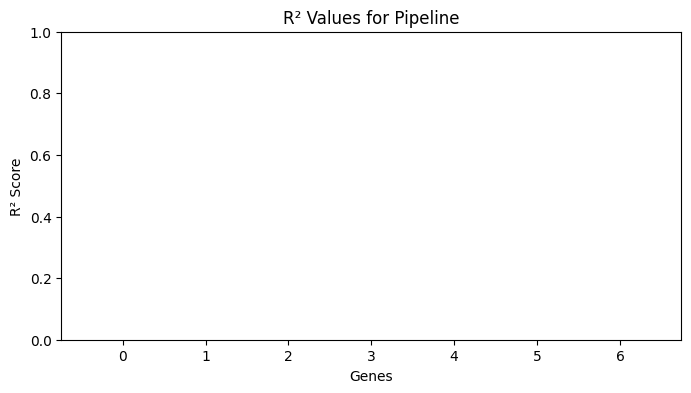

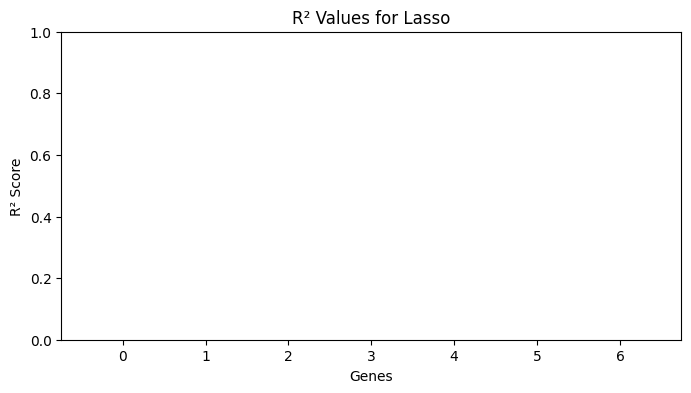

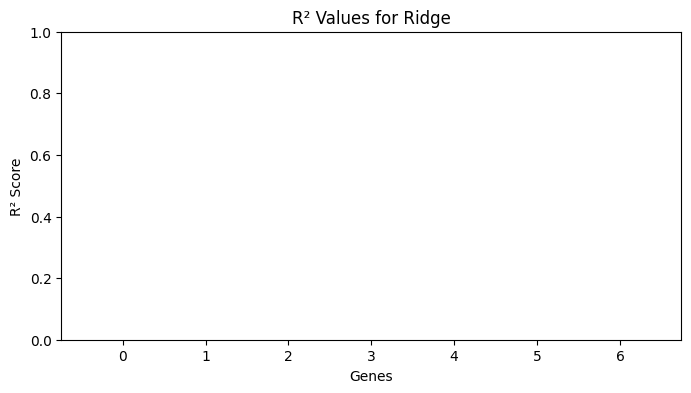

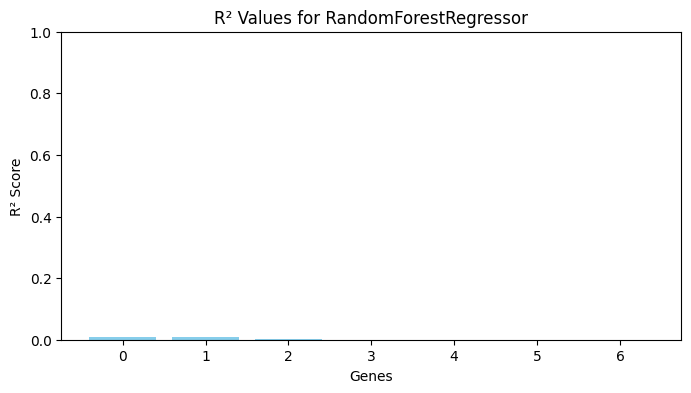

In [9]:
results_ExE = iterate_over_proportion_only_embeddings(ExE, embeddings, proportion, predictive_models_ExE)
print_results(results_ExE)
plot_results(results_ExE)

## NxN

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.186e-01, tolerance: 4.841e-04
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.845e-01


Model: Pipeline
Average R²:   -0.0033
Average RMSE: 0.0418

Model: Lasso
Average R²:   -0.1589
Average RMSE: 0.0452

Model: Ridge
Average R²:   -0.2893
Average RMSE: 0.0472

Model: RandomForestRegressor
Average R²:   -0.1990
Average RMSE: 0.0455


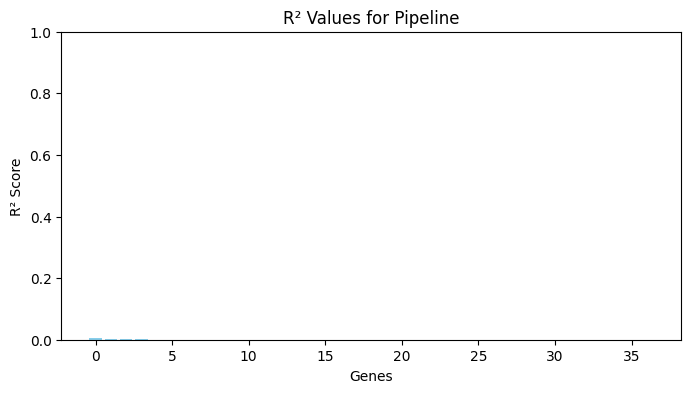

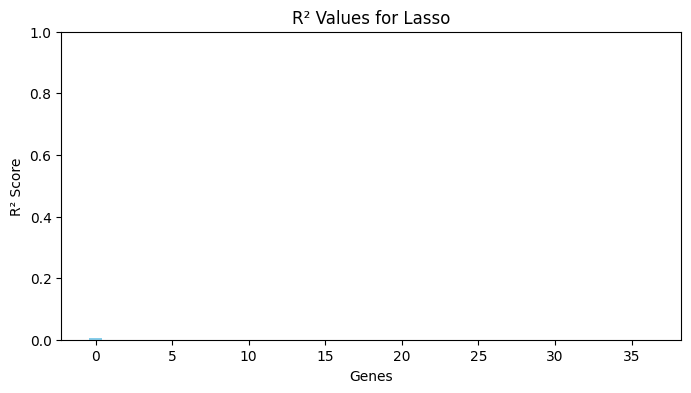

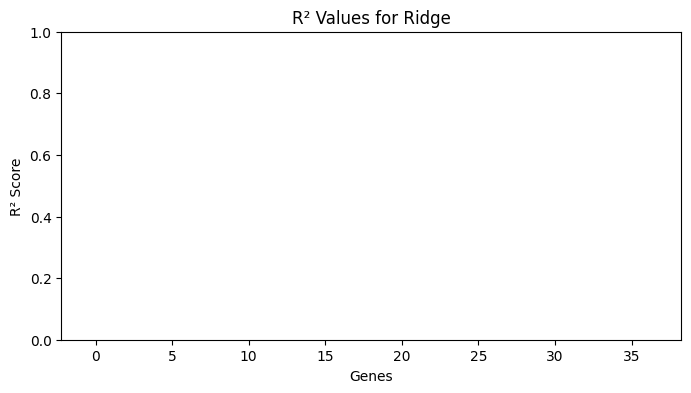

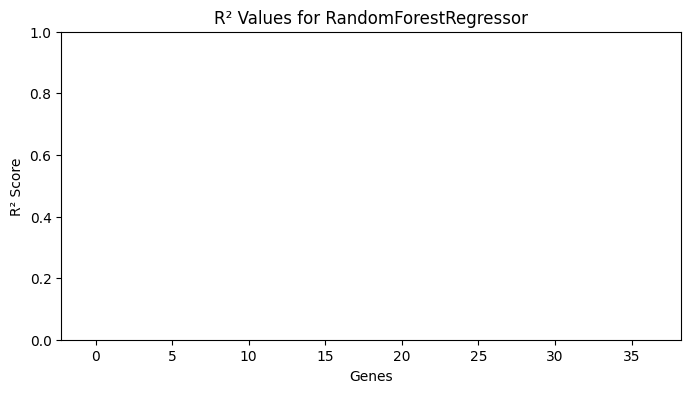

In [6]:
results_NxN = iterate_over_proportion_only_embeddings(NxN, embeddings, proportion, predictive_models_NxN)
print_results(results_NxN)
plot_results(results_NxN)

## ExN

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.277e-02, tolerance: 1.818e-04
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.312e-01, tolerance: 3.036e-04
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter


Model: Pipeline
Average R²:   -0.0050
Average RMSE: 0.0462

Model: Lasso
Average R²:   -0.4794
Average RMSE: 0.0560

Model: Ridge
Average R²:   -0.5977
Average RMSE: 0.0578

Model: RandomForestRegressor
Average R²:   -0.2512
Average RMSE: 0.0511


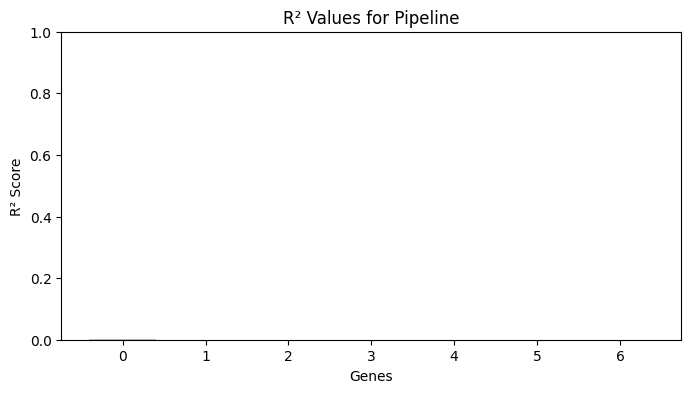

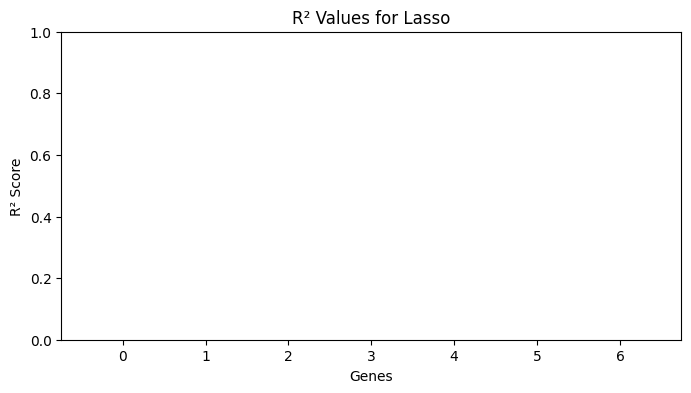

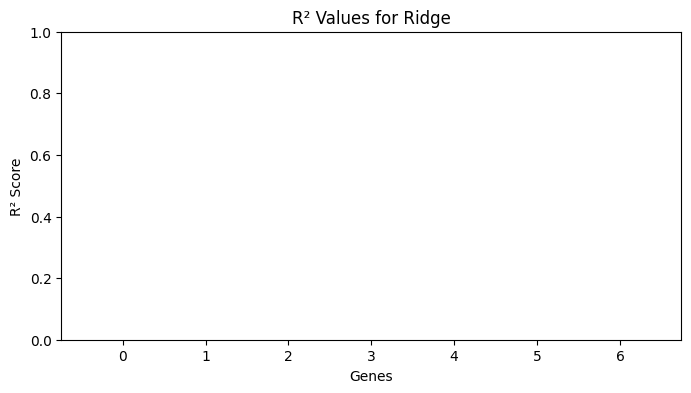

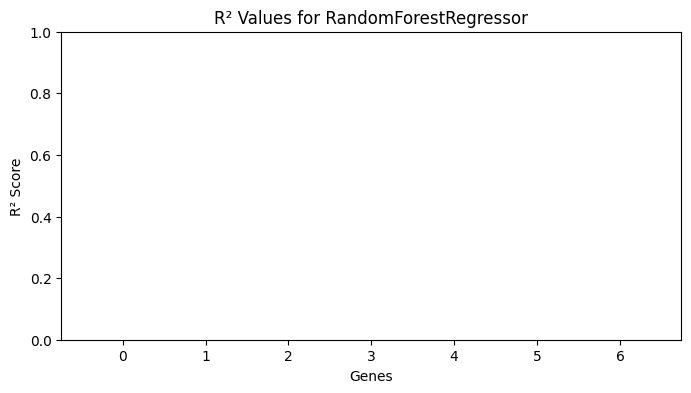

In [7]:
results_ExN = iterate_over_proportion_only_embeddings(ExN, embeddings, proportion, predictive_models_ExN)
print_results(results_ExN)
plot_results(results_ExN)


## Compilation Date

In [8]:
from datetime import datetime

now = datetime.now()
print(now.strftime("%Y-%m-%d %H:%M:%S"))

2025-05-09 12:28:40
